In [1]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-223-1.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6
0,-480,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,8.000000,76573.7,47.295609,1140.440,0.704391,NaN
2,276,12.600000,41835.4,47.223396,687.997,0.776604,NaN
3,527,16.783333,41691.8,47.157130,745.185,0.842870,NaN
4,778,20.966667,41658.8,47.032639,856.833,0.967361,NaN


In [2]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6
0,-480,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,8.000000,76573.7,47.295609,1140.440,0.704391,NaN
2,276,12.600000,41835.4,47.223396,687.997,0.776604,NaN
3,527,16.783333,41691.8,47.157130,745.185,0.842870,NaN
4,778,20.966667,41658.8,47.032639,856.833,0.967361,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        7.664483e-04 3.106198e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   5
Objective              <symfit.core.objectives.LeastSquares object at 0x7fb81499a2b0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fb81499a520>

Goodness of fit qualifiers:
chi_squared            0.46391948265390154
objective_value        0.23195974132695077
r_squared              0.8697223681208992


<IPython.core.display.Javascript object>


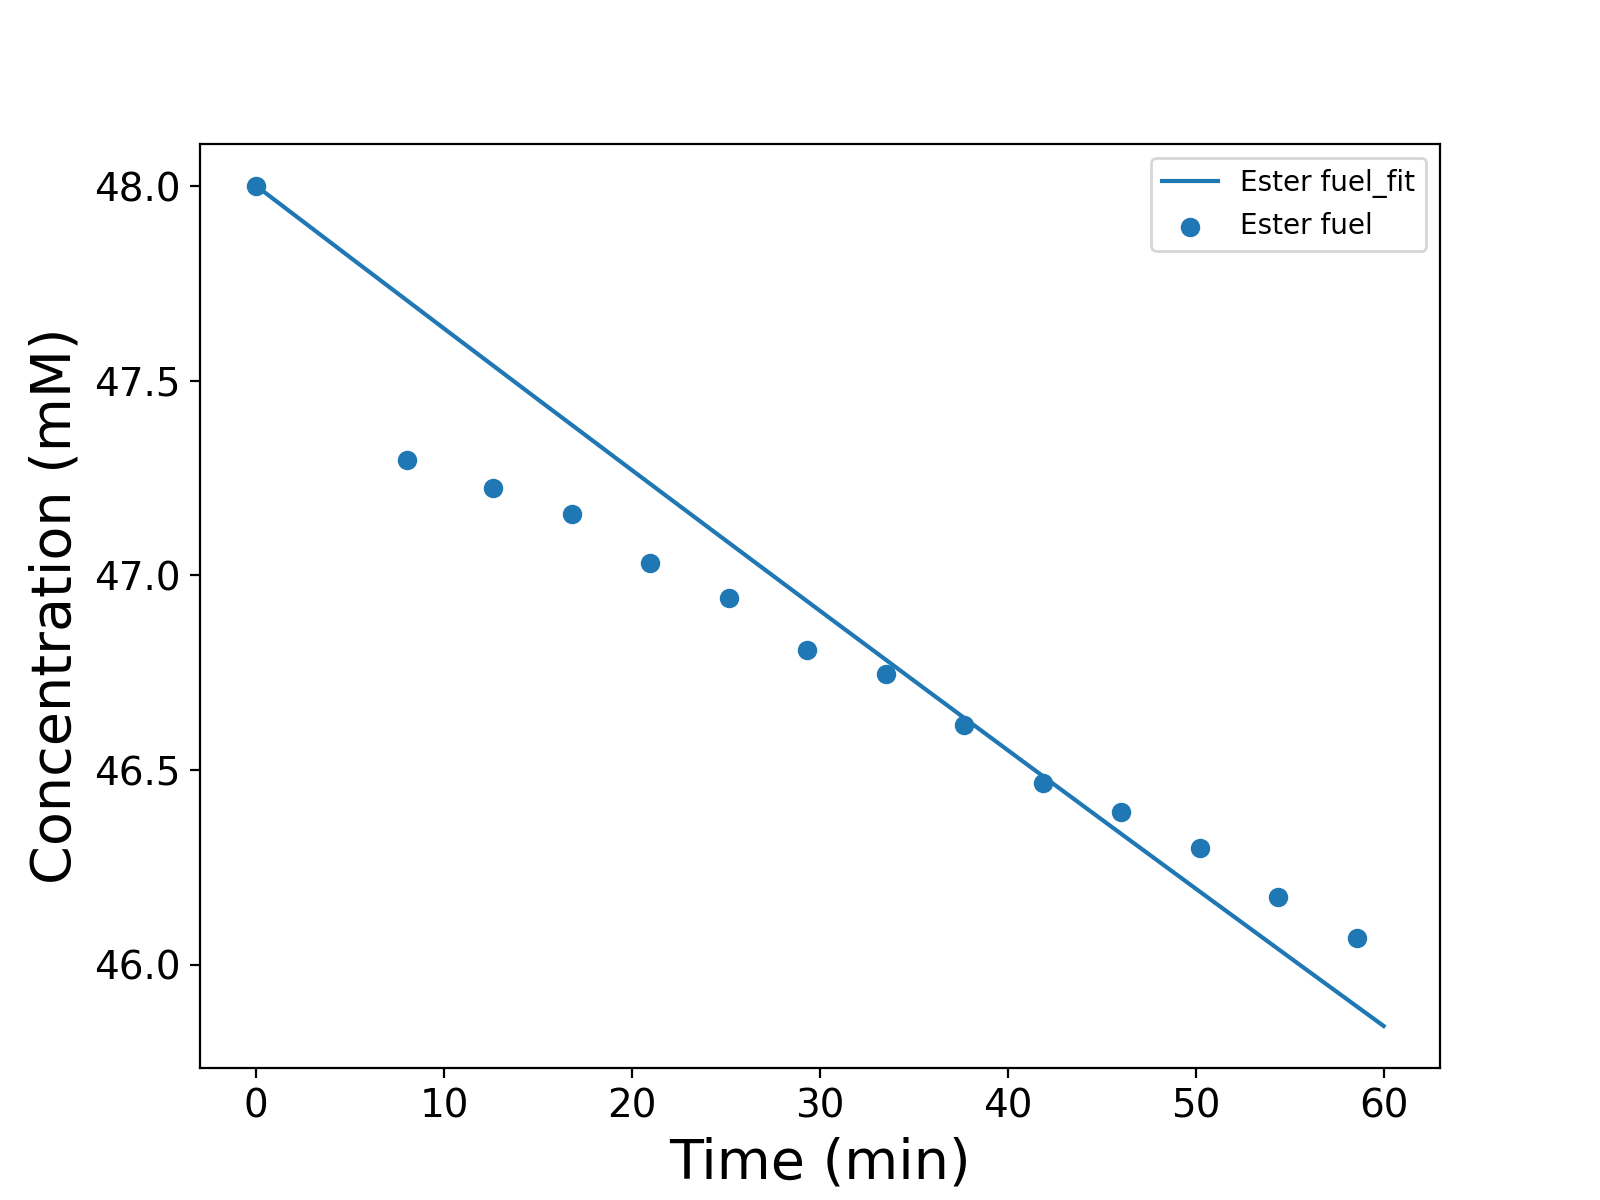

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-223-1 (pH 6.10) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [5]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-223-2.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Phenol waste,Unnamed: 8
0,-420,0.000000,1.0,48.000000,0.000,0.000000,0.000,0.000000,--
1,0,7.000000,81352.1,46.554013,1048.780,0.600168,1478.050,0.845819,NaN
2,274,11.566667,41052.2,46.332294,519.414,0.586221,958.238,1.081486,NaN
3,525,15.750000,40833.4,45.915123,689.170,0.774937,1164.960,1.309939,NaN
4,776,19.933333,40516.7,45.834369,533.796,0.603855,1380.580,1.561776,NaN


In [6]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Waste,Unnamed: 8
0,-420,0.000000,1.0,48.000000,0.000,0.000000,0.000,0.000000,--
1,0,7.000000,81352.1,46.554013,1048.780,0.600168,1478.050,0.845819,NaN
2,274,11.566667,41052.2,46.332294,519.414,0.586221,958.238,1.081486,NaN
3,525,15.750000,40833.4,45.915123,689.170,0.774937,1164.960,1.309939,NaN
4,776,19.933333,40516.7,45.834369,533.796,0.603855,1380.580,1.561776,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        2.000402e-03 7.217167e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   6
Objective              <symfit.core.objectives.LeastSquares object at 0x7fb828be32b0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fb828be32e0>

Goodness of fit qualifiers:
chi_squared            2.207264877474686
objective_value        1.103632438737343
r_squared              0.9090331967377039


<IPython.core.display.Javascript object>


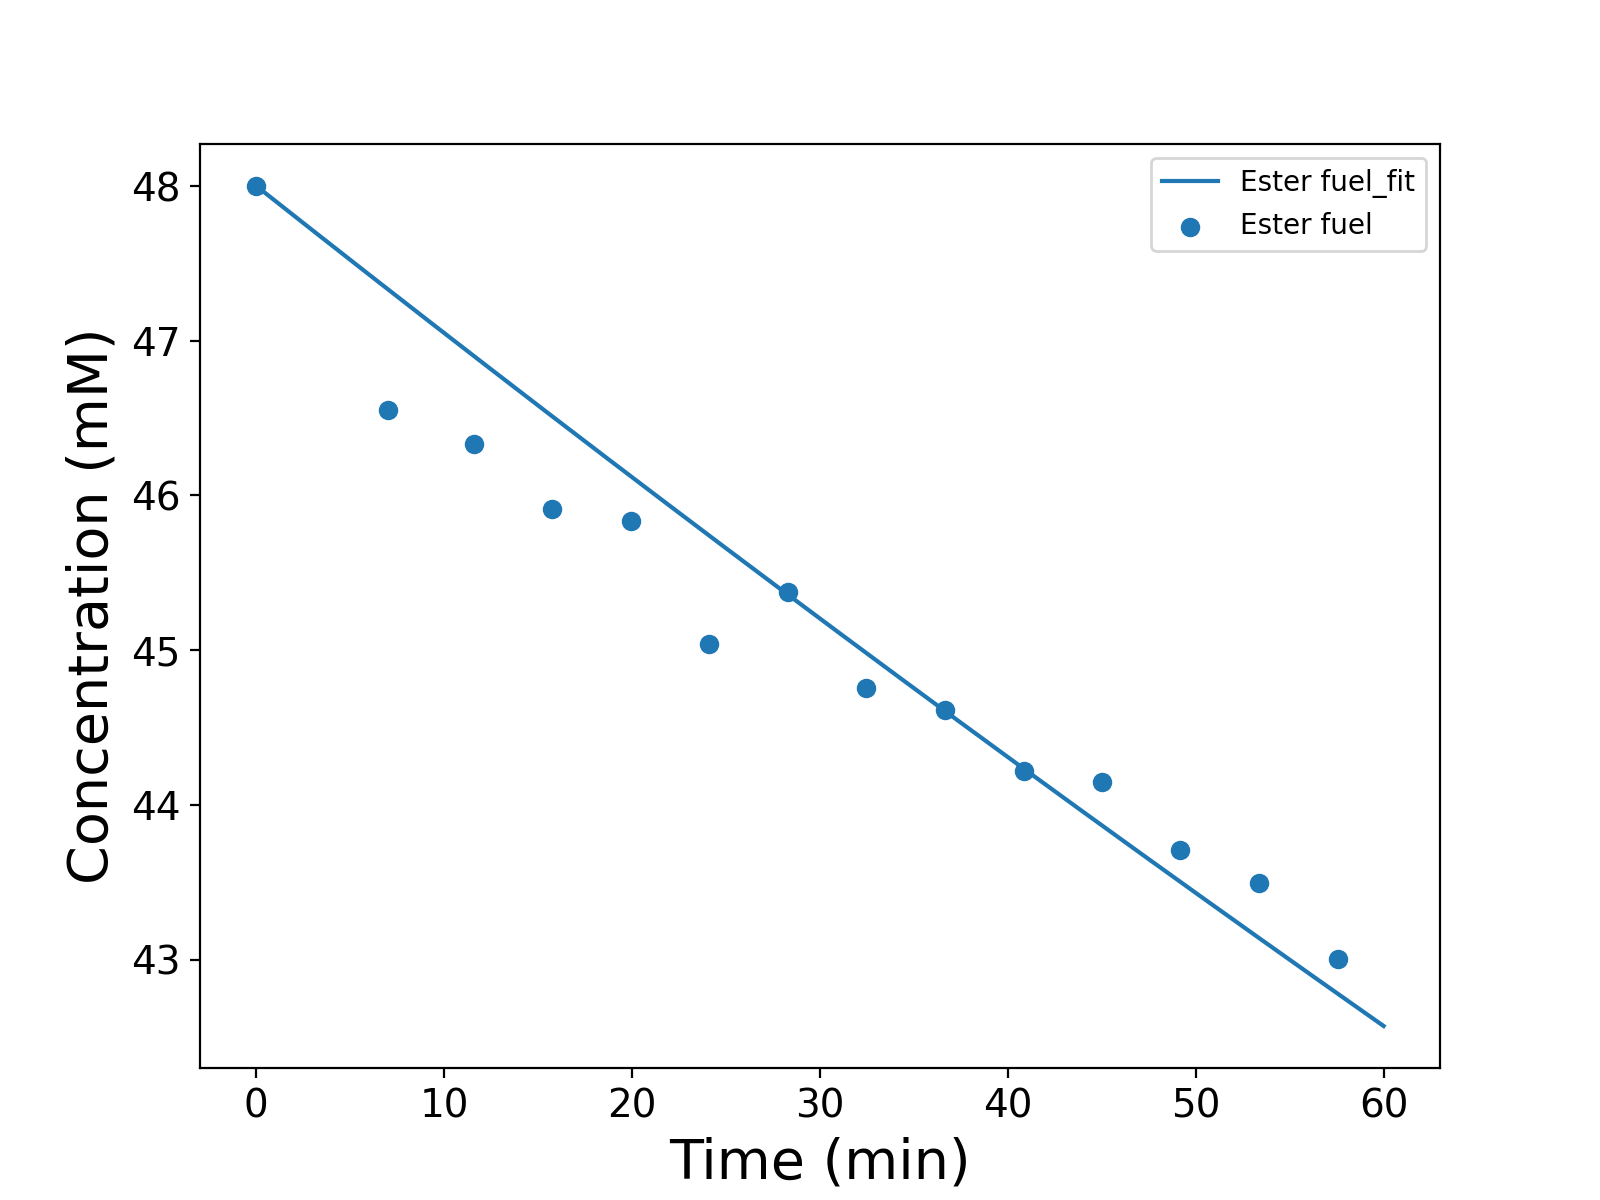

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-223-2 (pH 6.55) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [8]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-223-3.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Phenol waste,Unnamed: 8
0,-420,0.000000,1.0,48.000000,0.00,0.000000,0.00,0.000000,--
1,0,7.000000,75629.6,45.245722,1659.56,0.992839,2944.30,1.761440,NaN
2,282,11.700000,37068.3,43.853528,1350.21,1.597361,2154.70,2.549111,NaN
3,533,15.883333,36004.6,42.502162,1843.56,2.176258,2813.79,3.321580,NaN
4,784,20.066667,35027.7,41.589316,1961.69,2.329166,3437.57,4.081518,NaN


In [9]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Waste,Unnamed: 8
0,-420,0.000000,1.0,48.000000,0.00,0.000000,0.00,0.000000,--
1,0,7.000000,75629.6,45.245722,1659.56,0.992839,2944.30,1.761440,NaN
2,282,11.700000,37068.3,43.853528,1350.21,1.597361,2154.70,2.549111,NaN
3,533,15.883333,36004.6,42.502162,1843.56,2.176258,2813.79,3.321580,NaN
4,784,20.066667,35027.7,41.589316,1961.69,2.329166,3437.57,4.081518,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        6.454696e-03 1.151759e-04
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   4
Objective              <symfit.core.objectives.LeastSquares object at 0x7fb82089d250>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fb82089d040>

Goodness of fit qualifiers:
chi_squared            3.8289312116333267
objective_value        1.9144656058166634
r_squared              0.9837868429303441


<IPython.core.display.Javascript object>


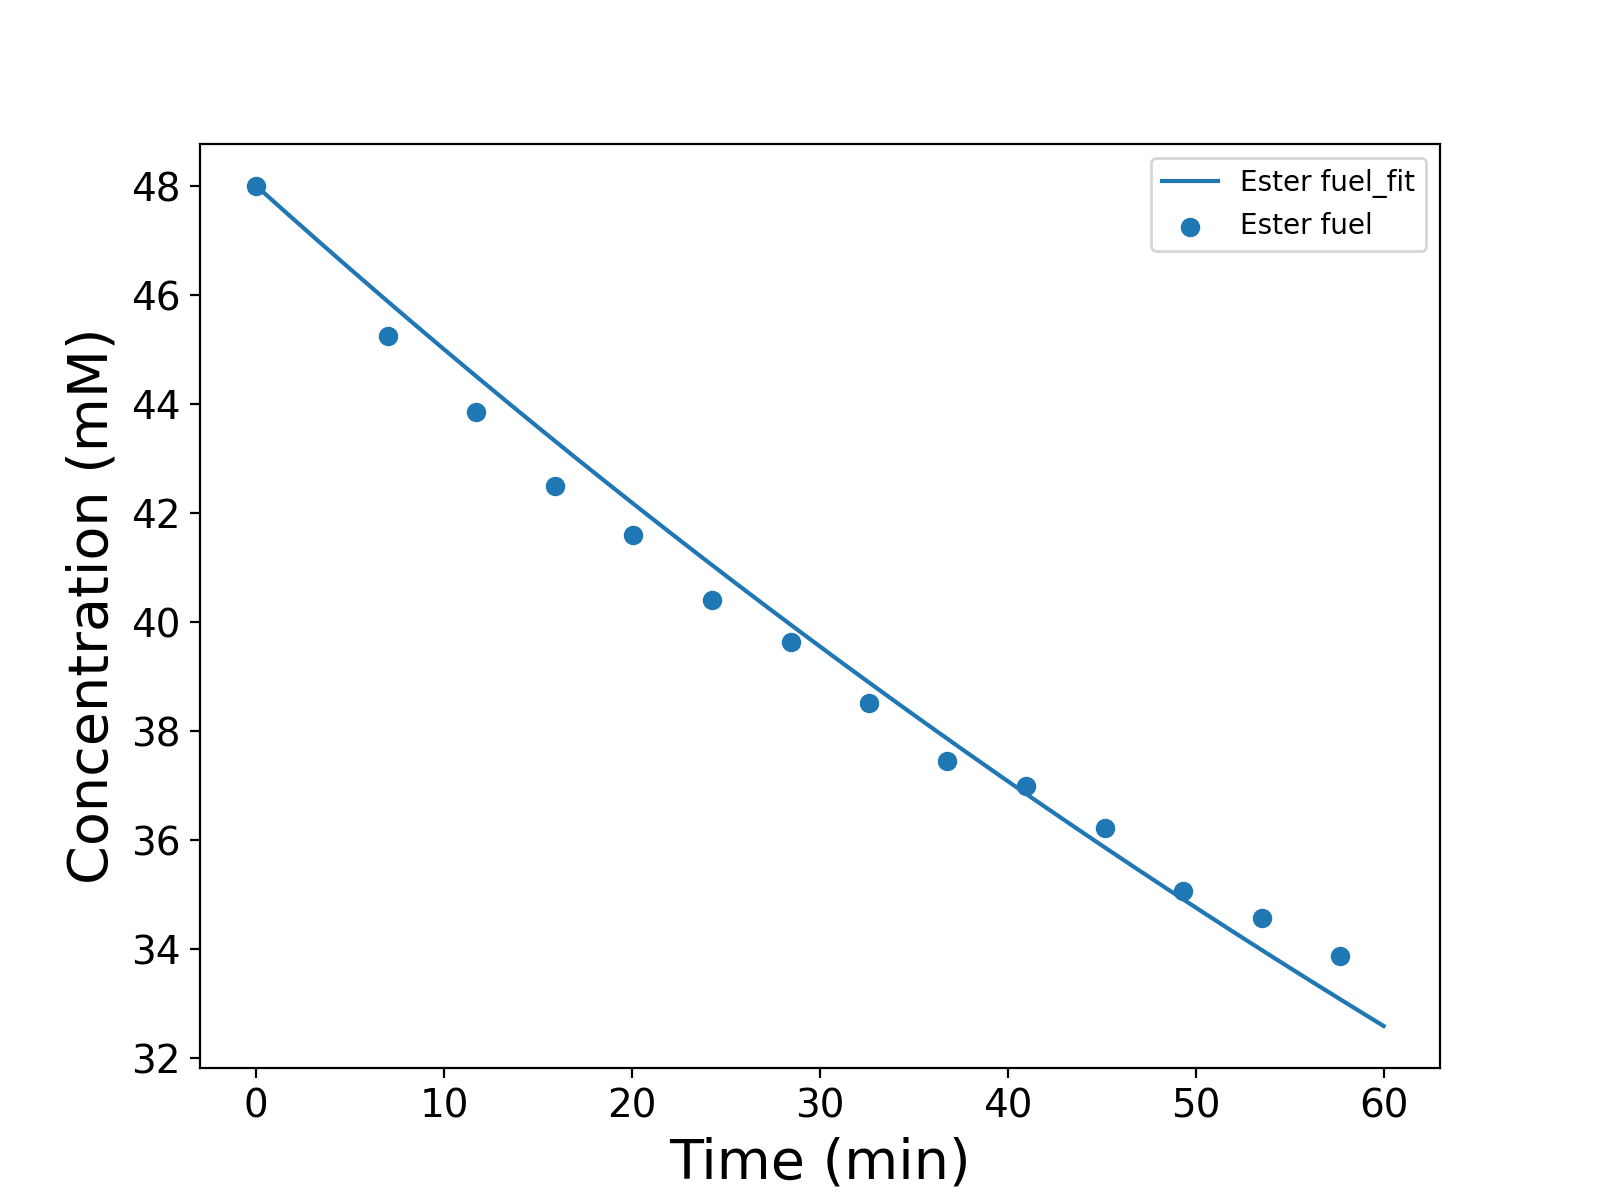

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-223-3 (pH 7.00) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [14]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-223-4.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Phenol waste,Unnamed: 8
0,-420,0.000000,1.0,48.000000,0.00,0.000000,0.0,0.000000,--
1,0,7.000000,42942.6,32.674921,6316.39,4.806126,13824.4,10.518953,NaN
2,279,11.650000,19620.2,24.155805,5630.10,6.931611,13737.0,16.912584,NaN
3,530,15.833333,14888.2,18.643857,6110.98,7.652519,17331.6,21.703623,NaN
4,781,20.016667,11494.7,14.603325,6265.69,7.960182,20021.8,25.436493,NaN


In [15]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Waste,Unnamed: 8
0,-420,0.000000,1.0,48.000000,0.00,0.000000,0.0,0.000000,--
1,0,7.000000,42942.6,32.674921,6316.39,4.806126,13824.4,10.518953,NaN
2,279,11.650000,19620.2,24.155805,5630.10,6.931611,13737.0,16.912584,NaN
3,530,15.833333,14888.2,18.643857,6110.98,7.652519,17331.6,21.703623,NaN
4,781,20.016667,11494.7,14.603325,6265.69,7.960182,20021.8,25.436493,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        5.693555e-02 7.890409e-04
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   3
Objective              <symfit.core.objectives.LeastSquares object at 0x7fb8208c9d30>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fb8208c9bb0>

Goodness of fit qualifiers:
chi_squared            5.668798628382072
objective_value        2.834399314191036
r_squared              0.9975011862823469


<IPython.core.display.Javascript object>


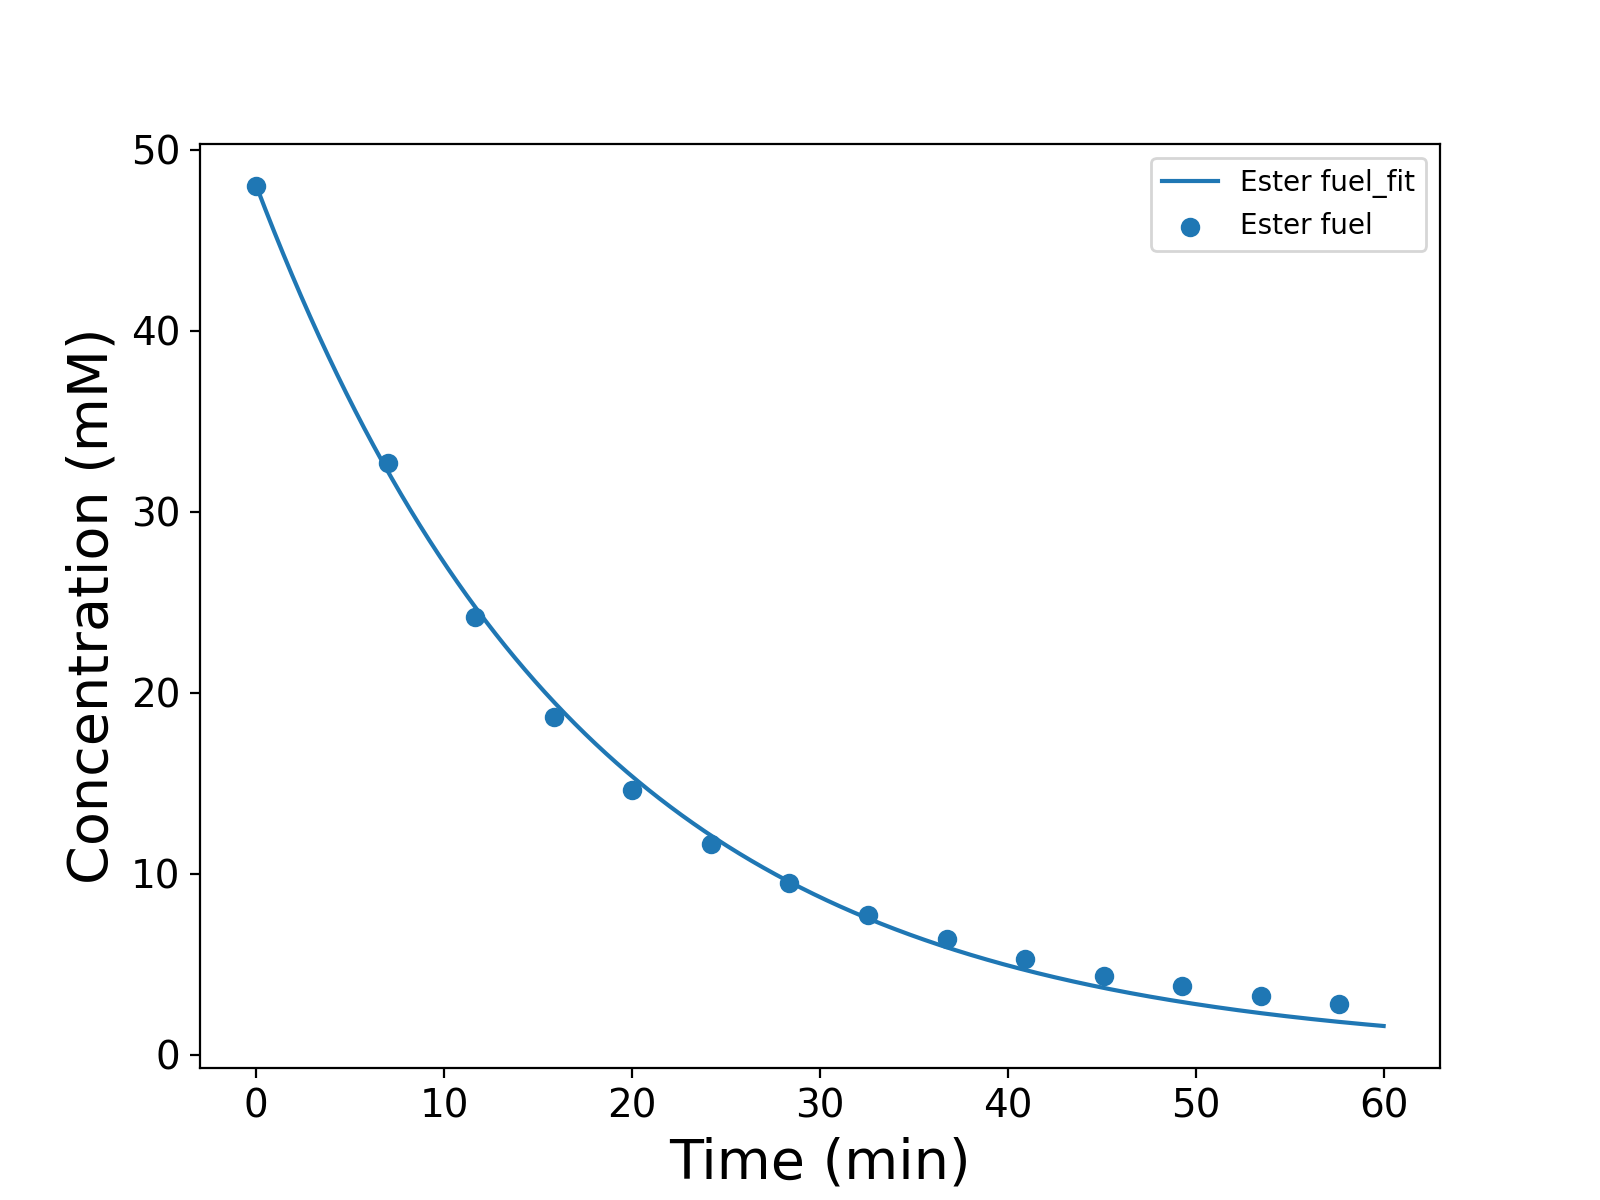

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-223-4 (pH 7.90) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()